In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data are shear viscosity (eta) of dipolar system with dipolar constant $\lambda=4$. Predict the viscosity of new data and find the relation between features for the best train.

In [2]:
data = pd.read_excel('Viscosity4.xlsx', skiprows=1)
data

,#V,P,P1,err_P1,rho,err_rho,rdf,rdf_x,eta,err_eta
0,V2,617.7090,0.986617,0.015466,0.575019,0.001785,4.234,0.346,0.785231,0.010479
1,V3,306.1370,0.488968,0.013116,0.465239,0.001783,4.387,0.346,0.503956,0.008460
2,V4,177.4680,0.283455,0.014234,0.381716,0.002231,4.736,0.346,0.367246,0.007649
3,V5,99.6141,0.159106,0.008472,0.317047,0.002445,5.256,0.346,0.277424,0.003499
4,V6,76.7948,0.122658,0.010106,0.266199,0.001801,5.829,0.346,0.222372,0.005125
5,V7,63.7032,0.101748,0.029098,0.225668,0.001596,6.577,0.346,0.179518,0.005482
6,V8,45.9816,0.073443,0.004941,0.192965,0.001303,7.249,0.346,0.152350,0.003337
7,V9,33.3371,0.053247,0.003916,0.166287,0.001941,7.969,0.346,0.129985,0.003801
8,V23,1635.3000,2.611930,0.029368,0.745539,0.004358,4.501,0.346,1.602840,0.020040
9,V24,880.5260,1.406390,0.031997,0.638188,0.003421,4.256,0.346,0.993185,0.014525


In [3]:
mydata=pd.DataFrame(data,columns=['P1','rho','rdf','eta'])
mydata

,P1,rho,rdf,eta
0,0.986617,0.575019,4.234,0.785231
1,0.488968,0.465239,4.387,0.503956
2,0.283455,0.381716,4.736,0.367246
3,0.159106,0.317047,5.256,0.277424
4,0.122658,0.266199,5.829,0.222372
5,0.101748,0.225668,6.577,0.179518
6,0.073443,0.192965,7.249,0.152350
7,0.053247,0.166287,7.969,0.129985
8,2.611930,0.745539,4.501,1.602840
9,1.406390,0.638188,4.256,0.993185


# Fuction etaEns(x) below is a rescale function for viscosity eta.

In [4]:
pi=math.pi
def log(x):       
       return math.log (x, 2.718281828459)

def etazero(a):
       a = float(a)
       return (0.1763578244/(a))

def ksi(x):
       return ((math.pi/6.0)*x)

def gCS(x):
       return ((1.0-0.5*ksi(x))/(1.0-ksi(x))**3.0)

def Zhs(x):
       return ((1.0+ksi(x)+ksi(x)**2.0-ksi(x)**3.0)/(1.0-ksi(x))**3.0)

def Lambda(m,S):
       return (m**2.0/(S**3.0))

def etaEns(x):
       Vexcl=((2.0/3.0)*math.pi)
       return (0.1763578244*(1.016/gCS(x)+0.8*Vexcl*x
              +0.7760*Vexcl*Vexcl*x*x*gCS(x)))
def rescalefunction(x):
       return etaEns(x*6./pi)

In [5]:
cols=['P1','rho','rdf','eta']
X=pd.DataFrame(data,columns=['P1','rdf','rho'])

In [6]:
eta0=data['eta']/etaEns(X['rho'])
#y=pd.DataFrame(eta0,columns=['ETA'])
y=eta0
y

0     1.067207
1     1.029652
2     0.996709
3     0.917345
4     0.843872
5     0.750437
6     0.682173
7     0.611574
8     1.100880
9     1.054411
10    1.053398
11    0.585532
12    1.076163
13    1.067207
14    1.029652
15    0.996709
16    0.917345
17    0.843872
18    0.750437
19    0.682173
20    0.611574
21    0.572506
22    0.515776
23    0.476165
24    0.450158
25    0.408317
26    0.418612
27    0.376672
28    0.374441
29    0.357440
30    0.345814
31    0.346989
32    1.100880
33    1.054411
34    1.053398
35    0.385203
36    0.368255
37    0.356674
38    0.352438
dtype: float64

(0.05, 1.25)

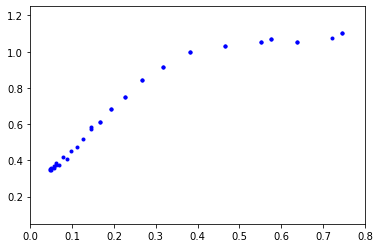

In [7]:
plt.plot(mydata['rho'], y,".", c="blue")
plt.xlim(0, 0.8)
plt.ylim(0.05, 1.25)

In [8]:
display(mydata.isnull().any())

P1     False
rho    False
rdf    False
eta    False
dtype: bool

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      39 non-null     float64
 1   rho     39 non-null     float64
 2   rdf     39 non-null     float64
 3   eta     39 non-null     float64
dtypes: float64(4)
memory usage: 1.3 KB


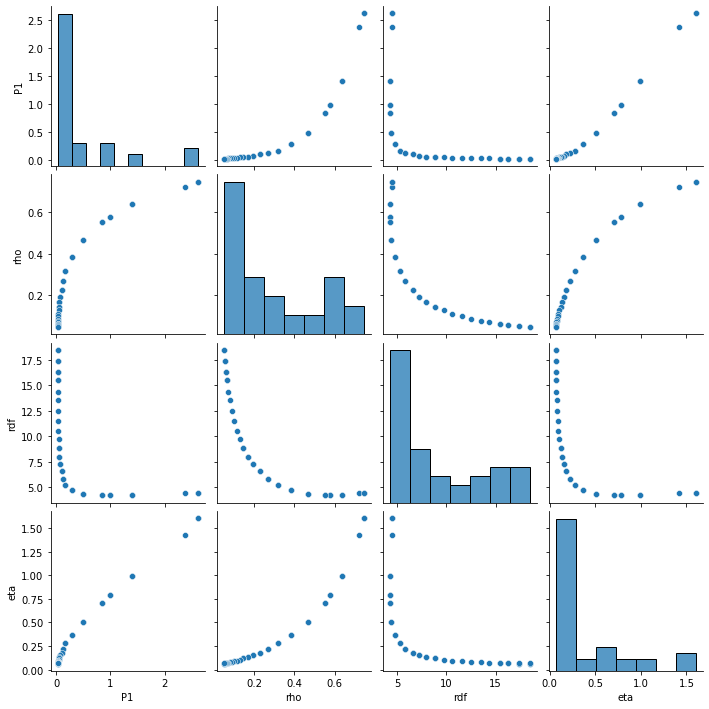

In [10]:
sns.pairplot(mydata)

# Check the correlation between features
## Pressure and density have strong correlation as we expect

<AxesSubplot:>

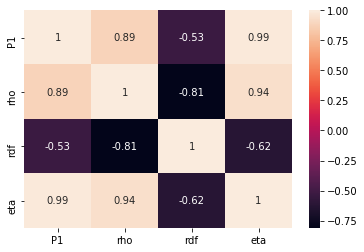

In [11]:
sns.heatmap(mydata.corr(),annot=True)

# Train Linear Regression

In [12]:
X

,P1,rdf,rho
0,0.986617,4.234,0.575019
1,0.488968,4.387,0.465239
2,0.283455,4.736,0.381716
3,0.159106,5.256,0.317047
4,0.122658,5.829,0.266199
5,0.101748,6.577,0.225668
6,0.073443,7.249,0.192965
7,0.053247,7.969,0.166287
8,2.611930,4.501,0.745539
9,1.406390,4.256,0.638188


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
regression_model= LinearRegression()

In [15]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [16]:
prediction=regression_model.predict(X_test)
prediction

array([1.12381343, 0.36142922, 0.79409245, 1.10572161, 0.33870464,
       0.43021937, 0.67880849, 0.40758427])

In [17]:
print(regression_model.intercept_)

0.528721365979823


In [18]:
mydata.shape

(39, 4)

# Results below are the best coefficient obtained by training, each coefficient is correspond to each feature 

In [19]:
result=regression_model.coef_
result

array([-0.16657227, -0.0148348 ,  1.3984822 ])

In [20]:
cfd=pd.DataFrame(result,X.columns)
cfd

,0
P1,-0.166572
rdf,-0.014835
rho,1.398482


In [21]:
#calculate the mean squared erorr
model_mse= mean_squared_error(y_test, prediction)

#calculate the mean absolute erorr
model_mae= mean_absolute_error(y_test,prediction)

#calculate the mean squared erorr
model_rmse= math.sqrt(model_mse)

print('MSE {:.3}'.format(model_mse))
print('MAE {:.3}'.format(model_mae))
print('RMSE {:.3}'.format(model_rmse))

MSE 0.00125
MAE 0.0272
RMSE 0.0353


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
33,1.054411,1.123813
36,0.368255,0.361429
4,0.843872,0.794092
13,1.067207,1.105722
30,0.345814,0.338705
26,0.418612,0.430219
6,0.682173,0.678808
27,0.376672,0.407584


# Accuracy

In [23]:
def mape(actual, predicted):
    return np.mean(100-np.abs((actual - predicted) / actual)* 100)

In [24]:
mape(y_test, prediction)

96.06596590912217

# Vitualize the obtained values vs actual values

In [25]:
prediction1=regression_model.predict(X)
prediction1

array([1.10572161, 1.03282104, 0.94507103, 0.86763159, 0.79409245,
       0.72979716, 0.67880849, 0.63418282, 1.06949782, 1.12381343,
       1.09484096, 0.59064213, 1.07730998, 1.10572161, 1.03282104,
       0.94507103, 0.86763159, 0.79409245, 0.72979716, 0.67880849,
       0.63418282, 0.59064213, 0.55305833, 0.5210349 , 0.48862428,
       0.4590887 , 0.43021937, 0.40758427, 0.38171002, 0.36142922,
       0.33870464, 0.31569008, 1.06949782, 1.12381343, 1.09484096,
       0.38171002, 0.36142922, 0.33870464, 0.31569008])

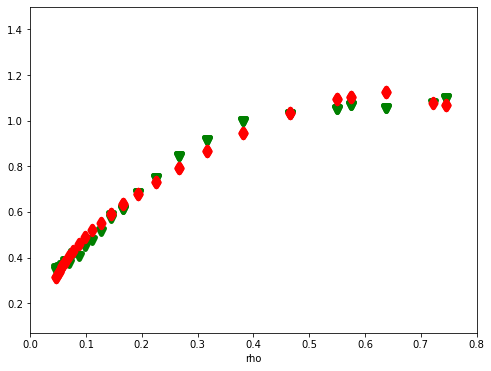

In [26]:
fig, (ax0) = plt.subplots(1, figsize=(8,6))

# We do not need to plot against LSTAT2, just LSTAT
ax0.scatter(mydata['rho'], y,color='green',  marker="v",lw=5)
ax0.scatter(mydata['rho'], prediction1.reshape((39,)),
         color='red', lw=5, marker="d", label="Predictions")
ax0.set_xlim([0.0,0.8])
ax0.set_ylim([0.07, 1.5])


ax0.set_xlabel("rho")

plt.show()

# Plot hypothesis obtained from coefficient and features

In [27]:
result=regression_model.coef_
result

array([-0.16657227, -0.0148348 ,  1.3984822 ])

In [28]:
X.shape

(39, 3)

In [29]:
theta=regression_model.coef_
theta.shape
theta

array([-0.16657227, -0.0148348 ,  1.3984822 ])

In [30]:
Z=0.528721365979823*np.ones(y.shape)
Z.shape

(39,)

In [31]:
X

,P1,rdf,rho
0,0.986617,4.234,0.575019
1,0.488968,4.387,0.465239
2,0.283455,4.736,0.381716
3,0.159106,5.256,0.317047
4,0.122658,5.829,0.266199
5,0.101748,6.577,0.225668
6,0.073443,7.249,0.192965
7,0.053247,7.969,0.166287
8,2.611930,4.501,0.745539
9,1.406390,4.256,0.638188


In [32]:
htheta=np.dot(theta,X.T)+Z
htheta.shape

(39,)

(0.068, 1.2)

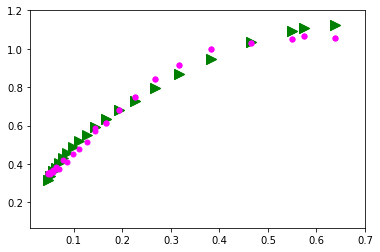

In [35]:
plt.plot(X['rho'], htheta,">", c="green",markersize=10)
plt.plot(X['rho'], y,".", c="magenta",markersize=10)
plt.xlim(0.01, 0.7)
plt.ylim(0.068, 1.2)